In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
import pandas as pd

# Importing the dataset with skipping bad lines
DATASET_COLUMNS = ['target', 'ids', 'date', 'flag', 'user', 'text']
DATASET_ENCODING = "ISO-8859-1"

# If using pandas version >= 1.3.0
df = pd.read_csv('tweets.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS, on_bad_lines='skip')

df.sample(15)


,target,ids,date,flag,user,text
290209,0,1995291247,Mon Jun 01 13:15:21 PDT 2009,NO_QUERY,bsktballalwayz,da 2rm into 1progress: I want 2rearrange&amp;m...
1083197,4,1968822822,Fri May 29 22:18:11 PDT 2009,NO_QUERY,ACD93,@itsNICKJONAS seriously....where have ya bein?
1042940,4,1957262117,Thu May 28 23:59:13 PDT 2009,NO_QUERY,Seeyam,hmmm.. i hope we'll go to the place where i wa...
744202,0,2267067640,Sun Jun 21 09:34:17 PDT 2009,NO_QUERY,jnshall,the weekends almost over...back to Montgomery
1477220,4,2066232430,Sun Jun 07 10:07:59 PDT 2009,NO_QUERY,kathrynmeyer,"@Jonasbrothers good morning boyss, only 10 day..."
89685,0,1755438430,Sun May 10 09:08:25 PDT 2009,NO_QUERY,angeltheamazing,Graduation
500608,0,2186903817,Mon Jun 15 19:30:18 PDT 2009,NO_QUERY,OrangeCountyGuy,Still at work but I get off in 30 minutes!!! ...
1566363,4,2187753169,Mon Jun 15 20:45:11 PDT 2009,NO_QUERY,amandaletrie,"sleep, day off tomorrow! thank god i have oliv..."
335950,0,2013899037,Tue Jun 02 23:53:21 PDT 2009,NO_QUERY,dekutam,@ckcoburn sorry we work then.
1136329,4,1976595661,Sat May 30 18:32:22 PDT 2009,NO_QUERY,jeffedgel,Had a great time in MA. The people of New Bedf...


[0 4]


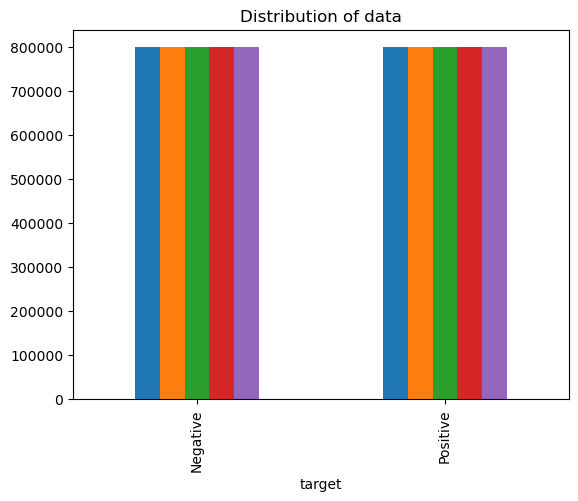

In [4]:
import matplotlib.pyplot as plt
# Check the unique values in the 'target' column
unique_targets = df['target'].unique()
print(unique_targets)
# Plotting the distribution for dataset
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data', legend=False)
# Storing data in lists
text, sentiment = list(df['text']), list(df['target'])
# Define default values for negative and positive indices
negative_index, positive_index = 0, 1
# Determine the correct positions for 'Negative' and 'Positive' categories
if 'Negative' in unique_targets and 'Positive' in unique_targets:
    negative_index = list(unique_targets).index('Negative')
    positive_index = list(unique_targets).index('Positive')
# Modify the x-axis tick positions and labels
plt.xticks([negative_index, positive_index], ['Negative', 'Positive'])
plt.show()

<Axes: xlabel='target', ylabel='count'>

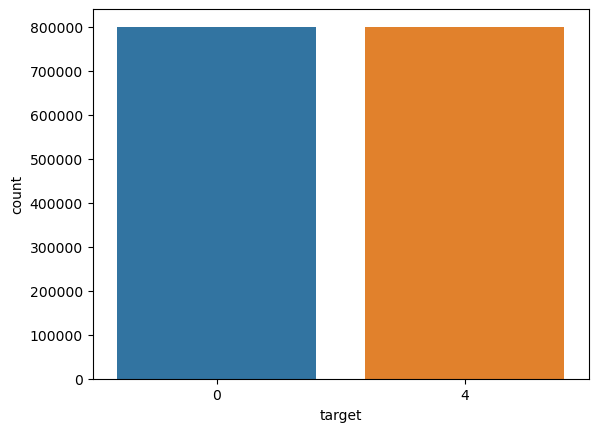

In [5]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [6]:
#Selecting the text and Target column for our further analysis
data=df[['text','target']]

In [7]:
# Use .loc to modify the DataFrame directly
data.loc[data['target'] == 4, 'target'] = 1

In [8]:
data['target'].unique()

array([0, 1], dtype=int64)

In [9]:
#seprating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [10]:
#Taking one-fourth of the data so we can run it on our machine easily
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [11]:
#Combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg])

In [12]:
#Making statement text in lowercase
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [13]:
#Defining set containing all stopwords in English.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [14]:
#Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].tail()

19995    not much time off weekend, work trip malmï¿½ f...
19996                                     one day holidays
19997                   feeling right .. hate damn humprey
19998    geez,i hv read whole book personality types em...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [15]:
#Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [16]:
#removing repeated characters
import re

def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

dataset['text'] = dataset['text'].apply(cleaning_repeating_char)
dataset['text'].tail()

19995    not much time of wekend work trip malmï¿½ fris...
19996                                     one day holidays
19997                       feling right hate damn humprey
19998    gezi hv read whole bok personality types embar...
19999    threw sign donie bent over get but thinge made...
Name: text, dtype: object

In [17]:
#Cleaning and removing URLs
import re 
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time of wekend work trip malmï¿½ fris...
19996                                     one day holidays
19997                       feling right hate damn humprey
19998    gezi hv read whole bok personality types embar...
19999    threw sign donie bent over get but thinge made...
Name: text, dtype: object

In [18]:
#Cleaning and removing numeric numbers
import re
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time of wekend work trip malmï¿½ fris...
19996                                     one day holidays
19997                       feling right hate damn humprey
19998    gezi hv read whole bok personality types embar...
19999    threw sign donie bent over get but thinge made...
Name: text, dtype: object

In [19]:
#Getting tokenization of tweet text
import pandas as pd

# Now you can apply your tokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].tail()

19995    [not, much, time, of, wekend, work, trip, malm...
19996                                 [one, day, holidays]
19997                 [feling, right, hate, damn, humprey]
19998    [gezi, hv, read, whole, bok, personality, type...
19999    [threw, sign, donie, bent, over, get, but, thi...
Name: text, dtype: object

In [20]:
#Applying stemming

import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].tail()

19995    [not, much, time, of, wekend, work, trip, malm...
19996                                 [one, day, holidays]
19997                 [feling, right, hate, damn, humprey]
19998    [gezi, hv, read, whole, bok, personality, type...
19999    [threw, sign, donie, bent, over, get, but, thi...
Name: text, dtype: object

In [21]:
#Applying lemmatizer

import nltk
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].tail()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


19995    [not, much, time, of, wekend, work, trip, malm...
19996                                 [one, day, holidays]
19997                 [feling, right, hate, damn, humprey]
19998    [gezi, hv, read, whole, bok, personality, type...
19999    [threw, sign, donie, bent, over, get, but, thi...
Name: text, dtype: object

In [22]:
%pip install pyspellchecker


Note: you may need to restart the kernel to use updated packages.


In [23]:
#Step 1: Converting acronyms
#It will get convert when the acronym is present in the dataset.
import pandas as pd
import re

# Step 2: Create a dictionary of acronyms and their full forms
acronym_dict = {
    'AI': 'Artificial Intelligence',
    'ML': 'Machine Learning',
    'SMS': 'Short Message Service'
}

# Step 3: Define a function to replace acronyms
def replace_acronyms(text_data, acronym_dict):
    pattern = r'\b(?:' + '|'.join(re.escape(key) for key in acronym_dict.keys()) + r')\b'  # Matches any of the acronyms as whole words
    
    def replace(match):
        acronym = match.group(0)
        return acronym_dict.get(acronym.upper(), acronym)  # Convert to uppercase to handle case sensitivity
    
    replaced_text_data = [re.sub(pattern, replace, text, flags=re.IGNORECASE) for text in text_data]
    
    return replaced_text_data

# Step 4: Call the function and update the dataset
dataset['text'] = replace_acronyms(dataset['text'].astype(str), acronym_dict)

# Step 5: Save the modified dataset if needed
# Example assuming you want to save it to 'modified_dataset.csv'
dataset.to_csv('modified_dataset.csv', index=False)
dataset['text'].tail()

19995    ['not', 'much', 'time', 'of', 'wekend', 'work'...
19996                           ['one', 'day', 'holidays']
19997       ['feling', 'right', 'hate', 'damn', 'humprey']
19998    ['gezi', 'hv', 'read', 'whole', 'bok', 'person...
19999    ['threw', 'sign', 'donie', 'bent', 'over', 'ge...
Name: text, dtype: object

In [24]:
pip install googletrans==4.0.0-rc1


Note: you may need to restart the kernel to use updated packages.


In [25]:
from googletrans import Translator

# Example text in another language
text_to_translate = "Bonjour tout le monde"

# Initialize the translator
translator = Translator()

# Translate the text to English
translated_text = translator.translate(text_to_translate, src='fr', dest='en')

# Print the translated text
print(translated_text.text)


Hello everybody


In [26]:
#Separating input feature and label
X=data.text
y=data.target

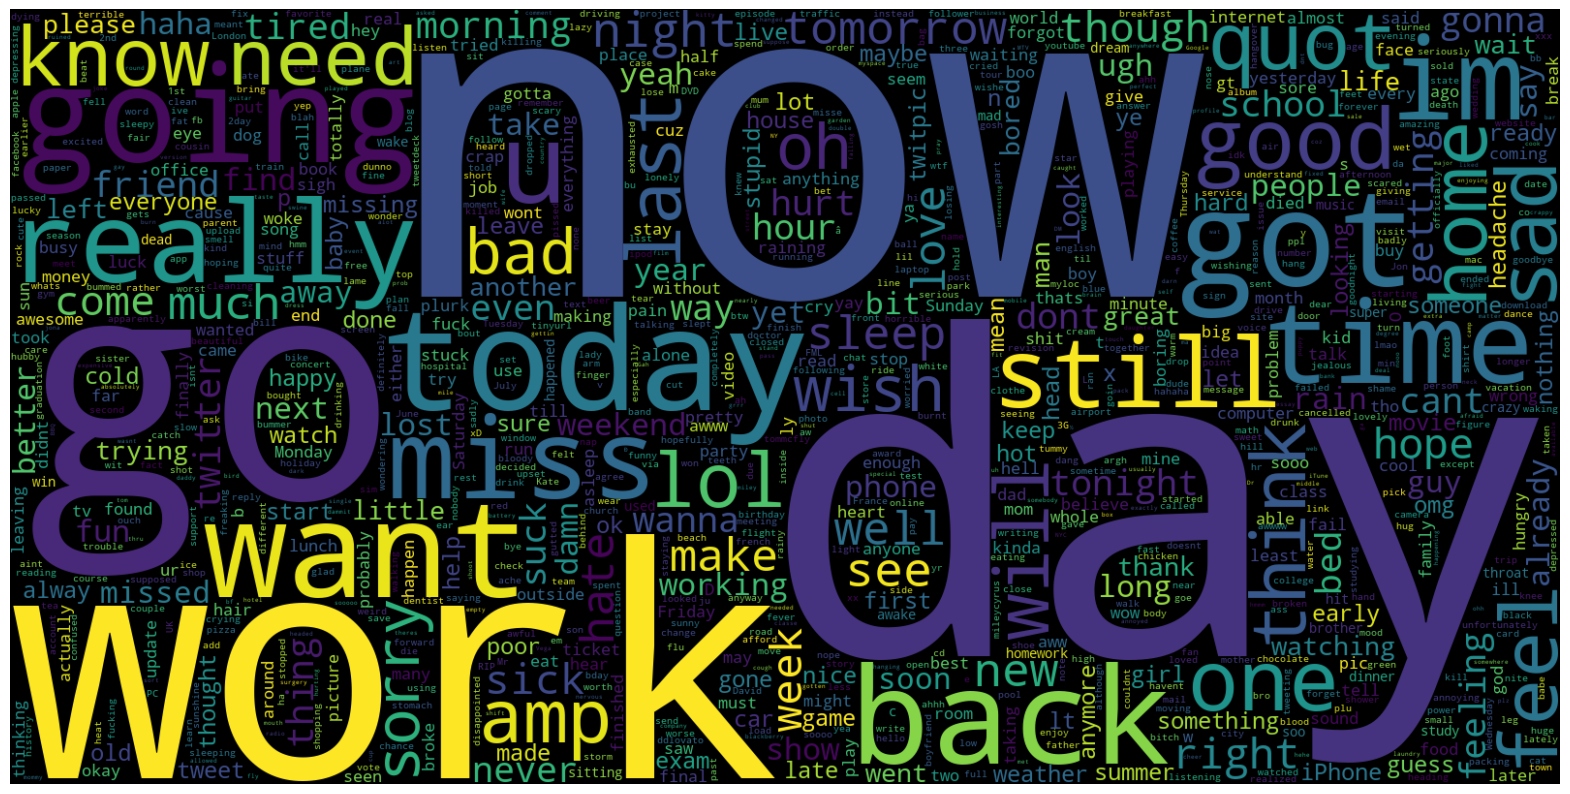

In [27]:
# Import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Drop NaN values from the 'text' column and ensure all values are strings
data_neg = data['text'][:800000].dropna().astype(str)

# Generate and plot the WordCloud
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Optional: turn off axis numbers
plt.show()


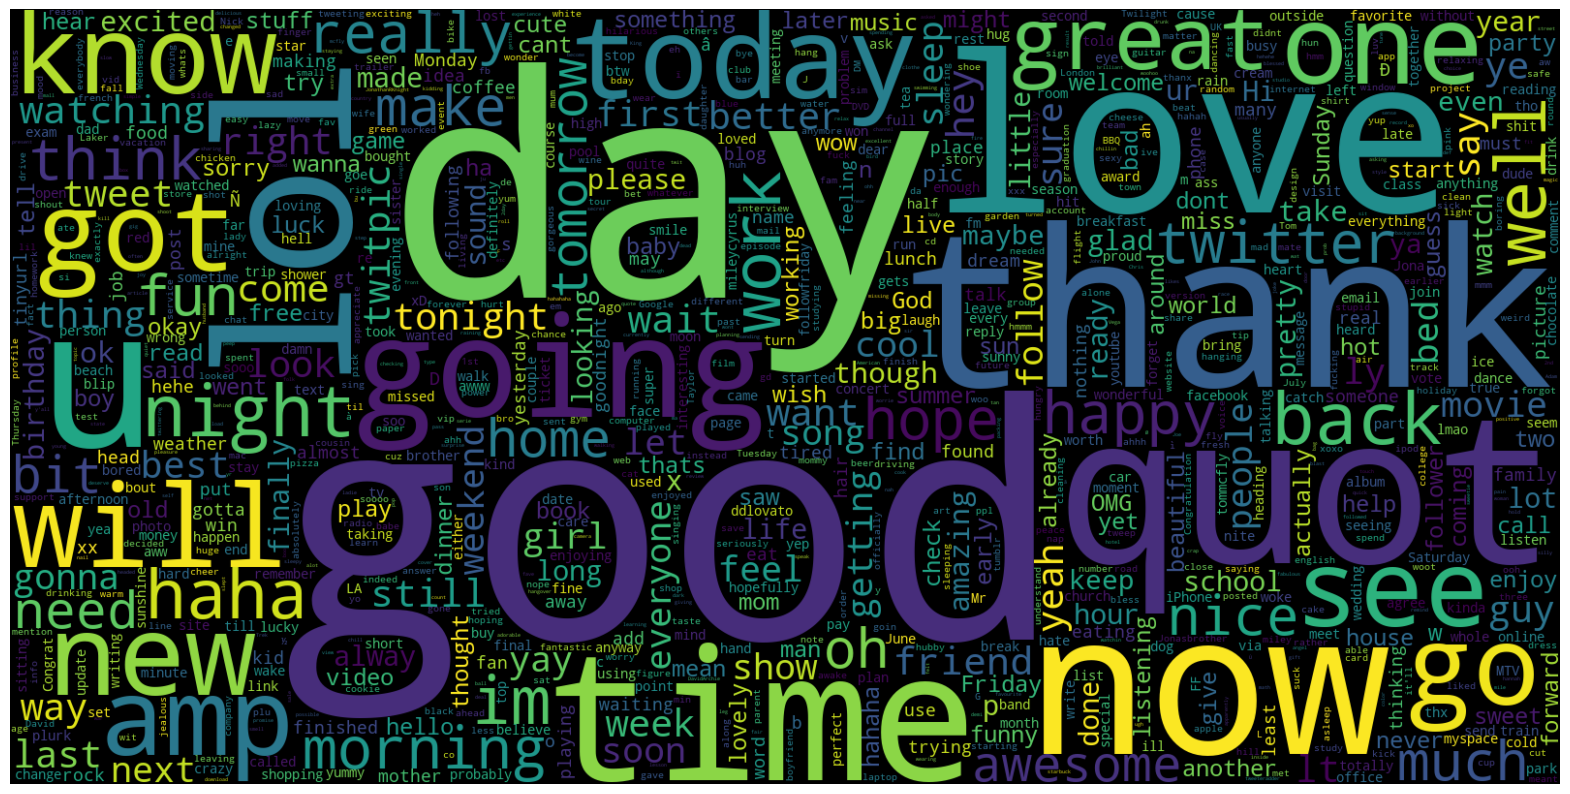

In [28]:
# Import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Drop NaN values from the 'text' column and ensure all values are strings
data_pos = data['text'][800000:].dropna().astype(str)

# Generate the WordCloud
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos))

# Plot the WordCloud
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Optional: turn off axis numbers
plt.show()


In [29]:
data_pos


800000          I LOVE @Health4UandPets u guys r the best!! 
800001     im meeting up with one of my besties tonight! ...
800002     @DaRealSunisaKim Thanks for the Twitter add, S...
800003     Being sick can be really cheap when it hurts t...
800004       @LovesBrooklyn2 he has that effect on everyone 
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 800000, dtype: object

In [30]:
# Assuming you want to get the value of the first row in the 'text' column
first_row_value = dataset['text'].iloc[291]
print(first_row_value)


['morning', 'havent', 'slep', 'yay']


In [31]:
data_pos


800000          I LOVE @Health4UandPets u guys r the best!! 
800001     im meeting up with one of my besties tonight! ...
800002     @DaRealSunisaKim Thanks for the Twitter add, S...
800003     Being sick can be really cheap when it hurts t...
800004       @LovesBrooklyn2 he has that effect on everyone 
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 800000, dtype: object

In [32]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [33]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [34]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)
    
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



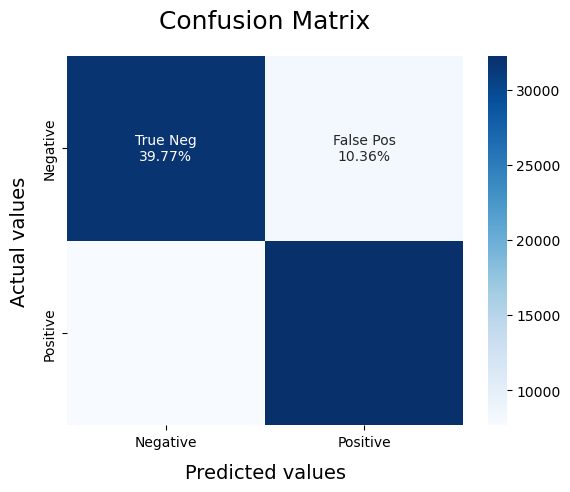

In [36]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

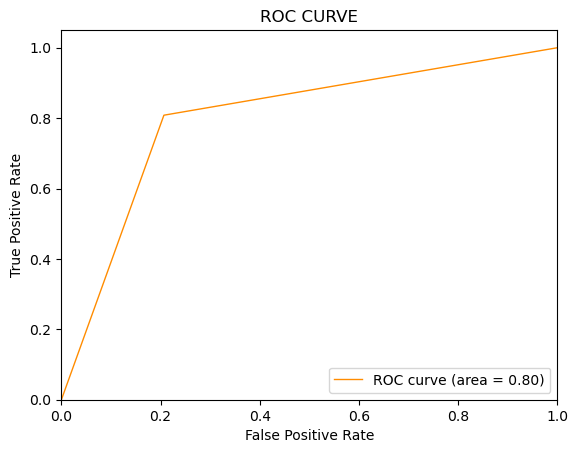

In [37]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()


              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



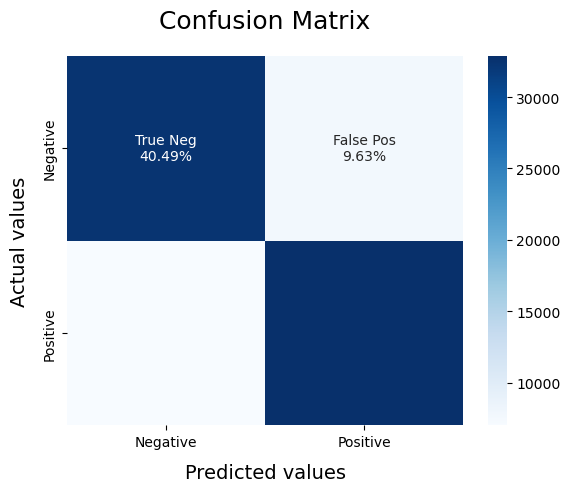

In [38]:
#Model 2
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

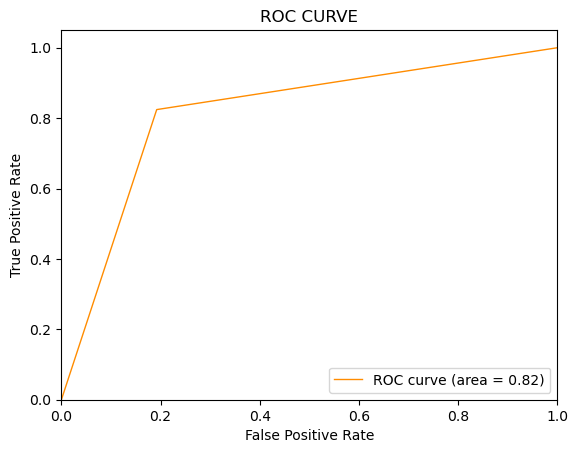

In [39]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()